In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/measurements.csv')

In [3]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df.shape

(388, 12)

In [5]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


From https://www.kaggle.com/datasets/anderas/car-consume

Content
Since a few months, i write down the data of my car's display after each ride; while regularly changing the gas type.

In the file, you will find the displayed distance (km); the consume (L/100km); the average speed (km/h), the temperature i had inside (°C), the temperature outside (°C), anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when i started it… and yes - the gas type i was using. I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it.

I started writing down the data in November, changed to SP98 in winter, and back to E10 in spring. Apart from that, the data is rather clean as i was doing my own project on it already.

Cleaning Up

In [6]:
df['distance'] = df['distance'].str.replace(',', '.').astype(float)

In [7]:
df['consume'] = df['consume'].str.replace(',', '.').astype(float)

In [8]:
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)

In [9]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

In [10]:
(df.isna().sum() / len(df)) * 100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
AC                0.000000
rain              0.000000
sun               0.000000
refill liters    96.649485
refill gas       96.649485
dtype: float64

In [11]:
df.drop(['refill liters', 'refill gas'], axis=1, inplace=True)

In [12]:
df.drop(['specials'], axis=1, inplace=True)

In [13]:
df.temp_inside.fillna(df.temp_inside.mode(), inplace=True)

In [14]:
df['temp_inside'] = df['temp_inside'].astype(float)

In [15]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [16]:
type(df['temp_inside'][0])

numpy.float64

In [17]:
df['temp_inside'] = df['temp_inside'].astype(float)
median_temp_inside = df['temp_inside'].median()

print(median_temp_inside)

22.0


In [18]:
df['temp_inside'].fillna(median_temp_inside, inplace=True)

In [19]:
(df.isna().sum() / len(df)) * 100

distance        0.0
consume         0.0
speed           0.0
temp_inside     0.0
temp_outside    0.0
gas_type        0.0
AC              0.0
rain            0.0
sun             0.0
dtype: float64

ANALYSIS

In [20]:
df['temp_diff'] = df.temp_inside - df.temp_outside

In [21]:
df['fuel_used'] = df.distance * df.consume /100

In [22]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff,fuel_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325


Cost of the trip based on fuel used

Germany Oct 2023

E10 = 1.81
SP98 = 2.02

In [23]:
df['cost_of_trip'] = np.where(df.gas_type == 'E10', df.fuel_used*1.81, df.fuel_used*2.02).round(3)

In [24]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.534
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.912
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.115
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.911
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.507


In [25]:
df['trip_in_hours'] = df.speed/60

In [26]:
df['avg_speed'] = df.distance/df.trip_in_hours

In [27]:
df.drop(['speed'], axis=1, inplace=True)

In [28]:
df.to_csv('./data/cleaned_measurements.csv', index=False)

VISUALIZATION

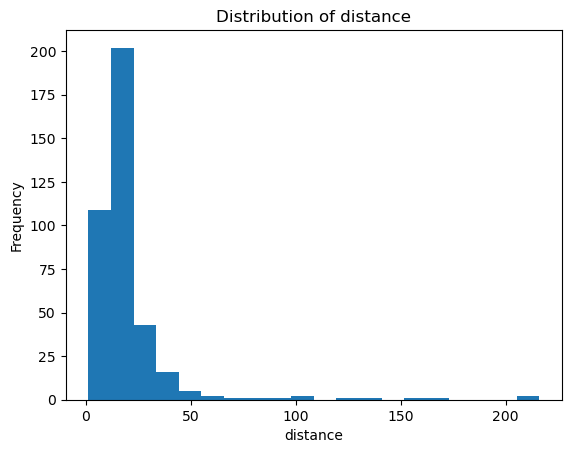

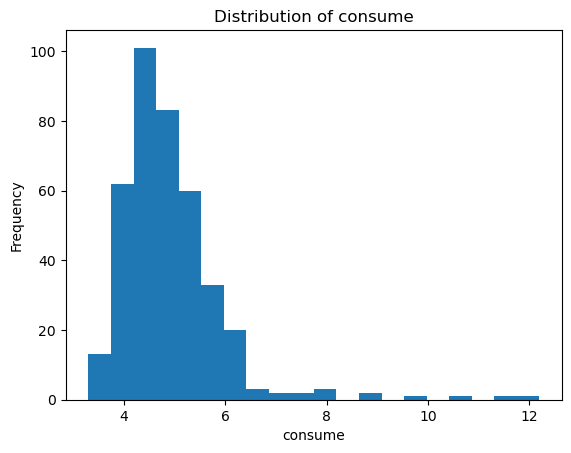

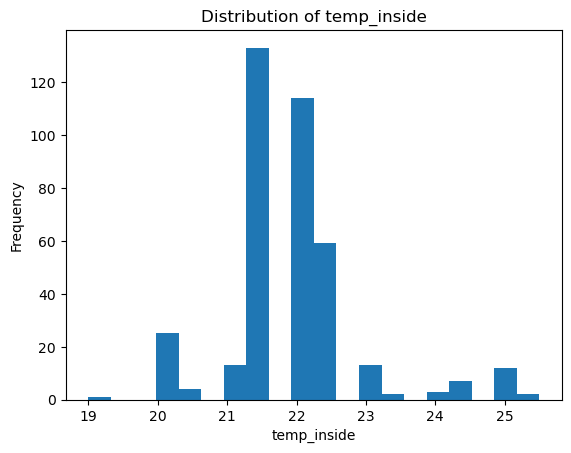

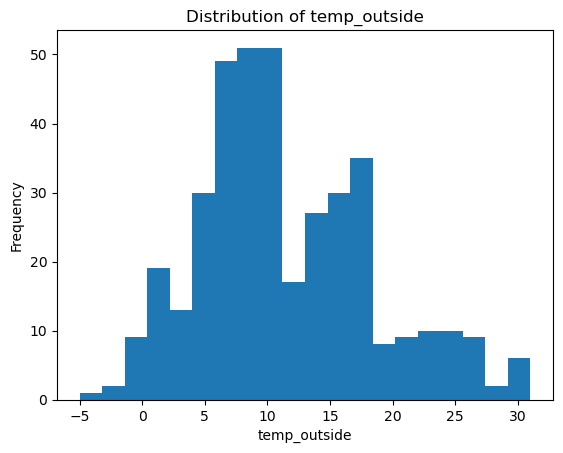

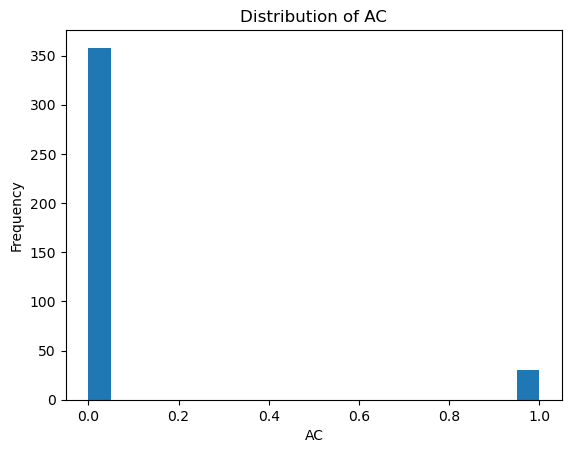

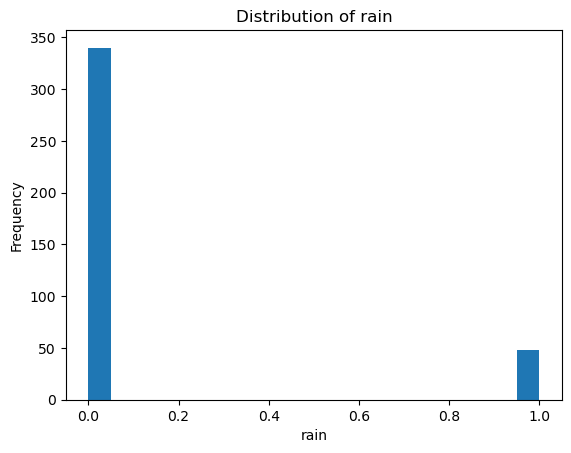

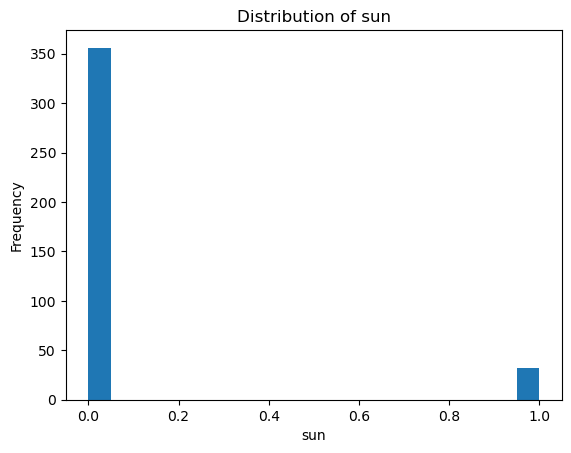

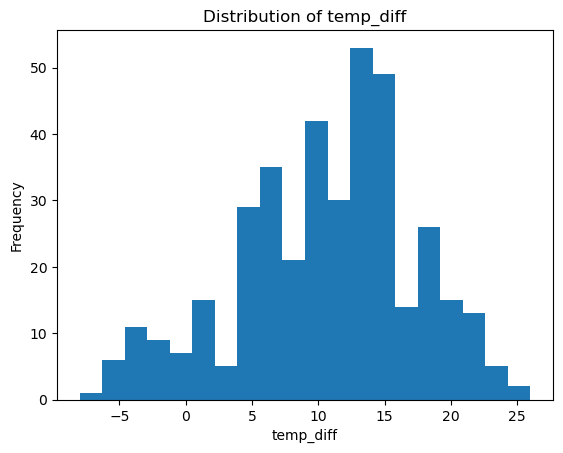

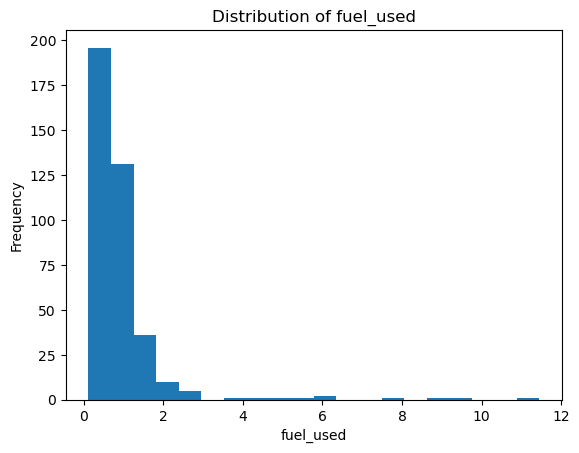

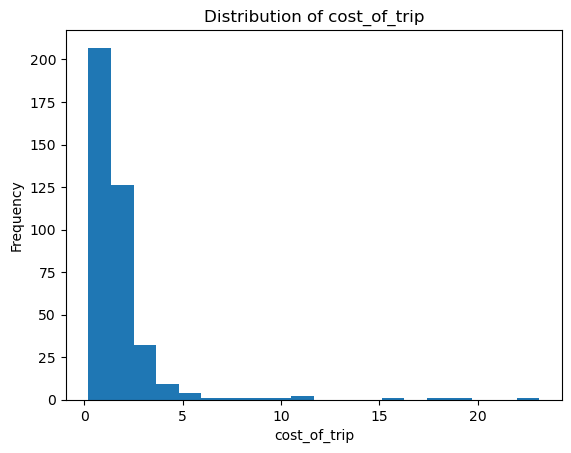

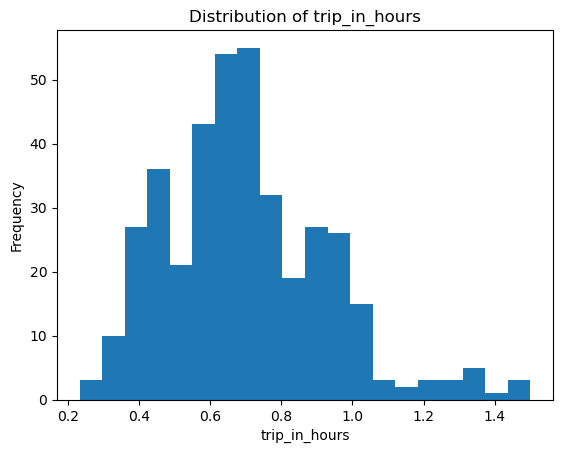

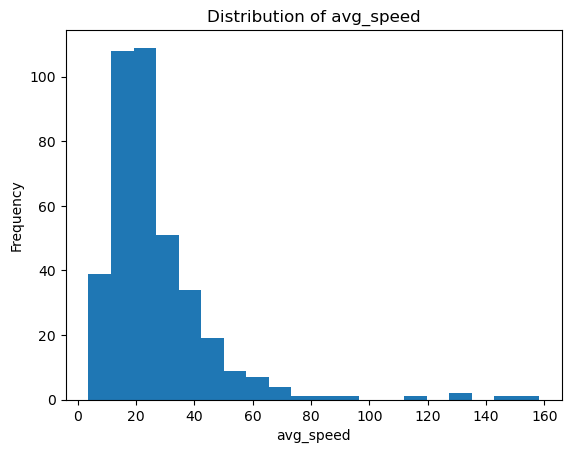

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include='number')

for column in numerical_columns.columns:
    plt.figure()
    plt.hist(numerical_columns[column], bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.show()

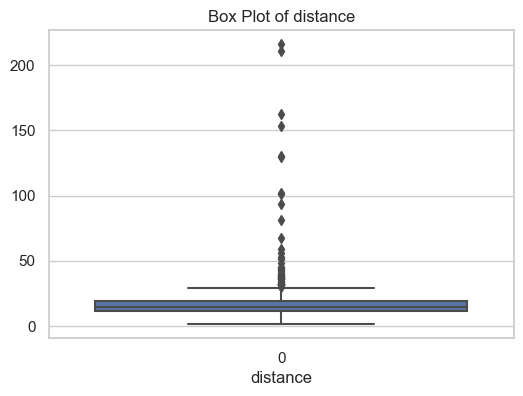

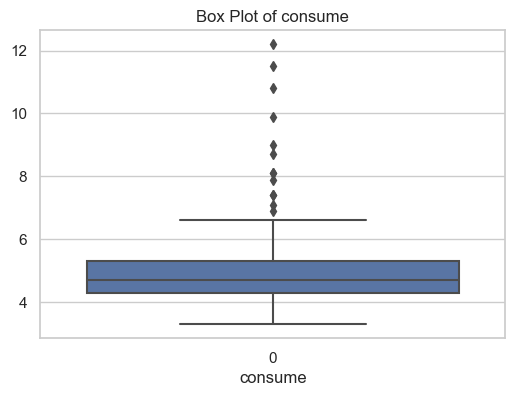

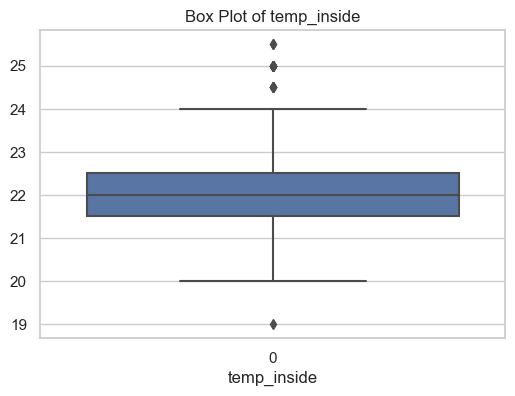

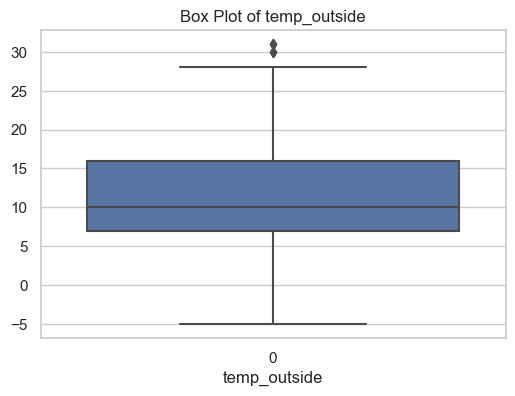

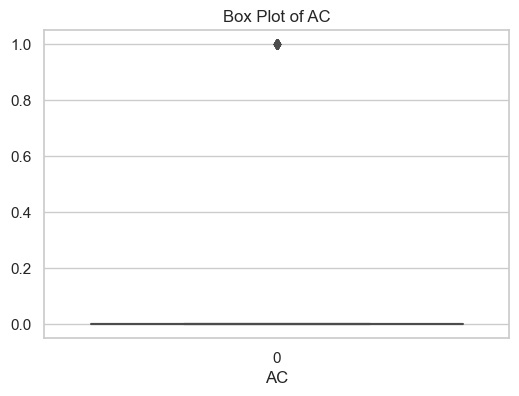

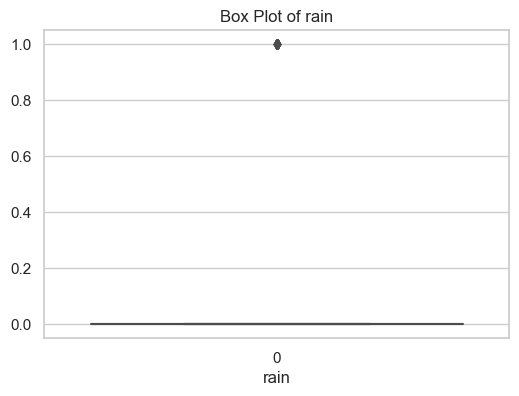

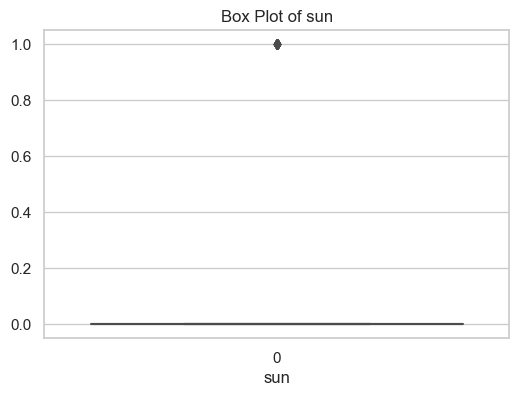

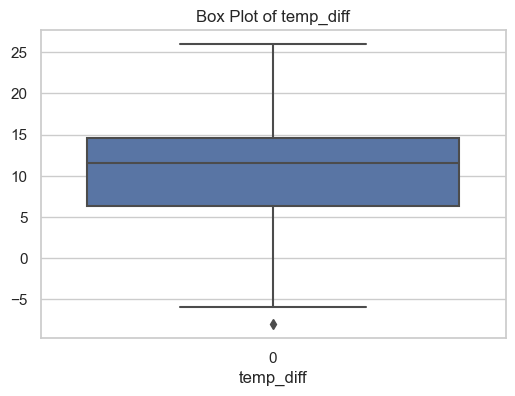

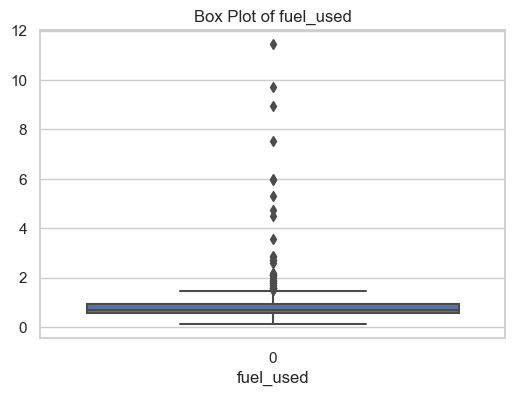

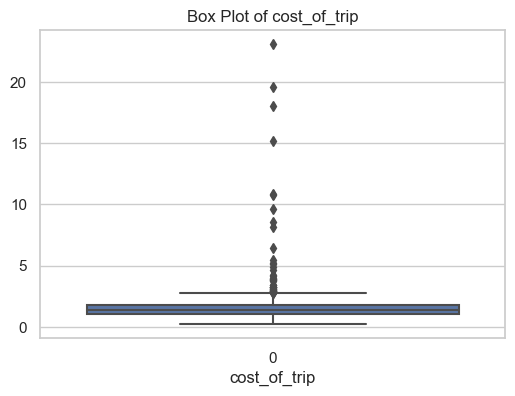

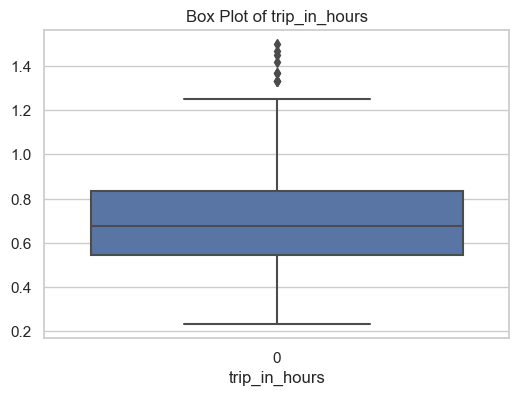

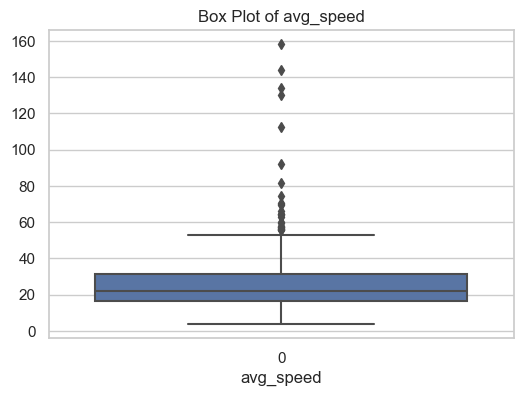

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include='number')

sns.set(style="whitegrid")

for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(data=numerical_columns[column], orient="w")  
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()

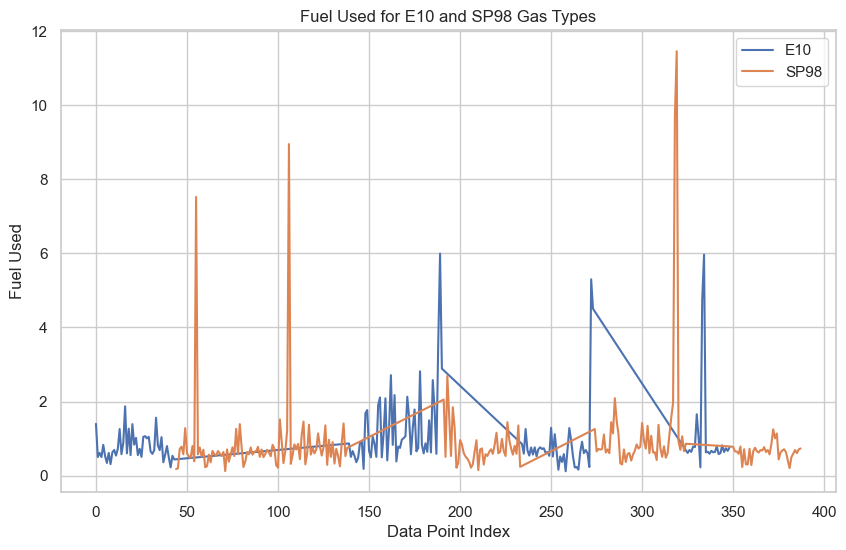

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

e10_data = df[df['gas_type'] == 'E10']
sp98_data = df[df['gas_type'] == 'SP98']

plt.figure(figsize=(10, 6))  

plt.plot(e10_data['fuel_used'], label='E10')
plt.plot(sp98_data['fuel_used'], label='SP98')

plt.title("Fuel Used for E10 and SP98 Gas Types")
plt.xlabel("Data Point Index")
plt.ylabel("Fuel Used")
plt.legend() 

plt.show()


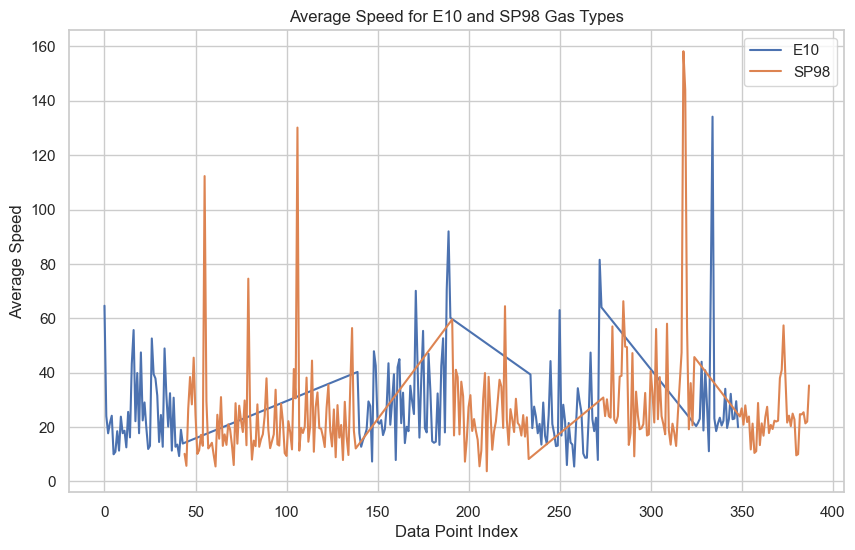

In [32]:
plt.figure(figsize=(10, 6))  

plt.plot(e10_data['avg_speed'], label='E10')
plt.plot(sp98_data['avg_speed'], label='SP98')

plt.title("Average Speed for E10 and SP98 Gas Types")
plt.xlabel("Data Point Index")
plt.ylabel("Average Speed")
plt.legend() 

plt.show()

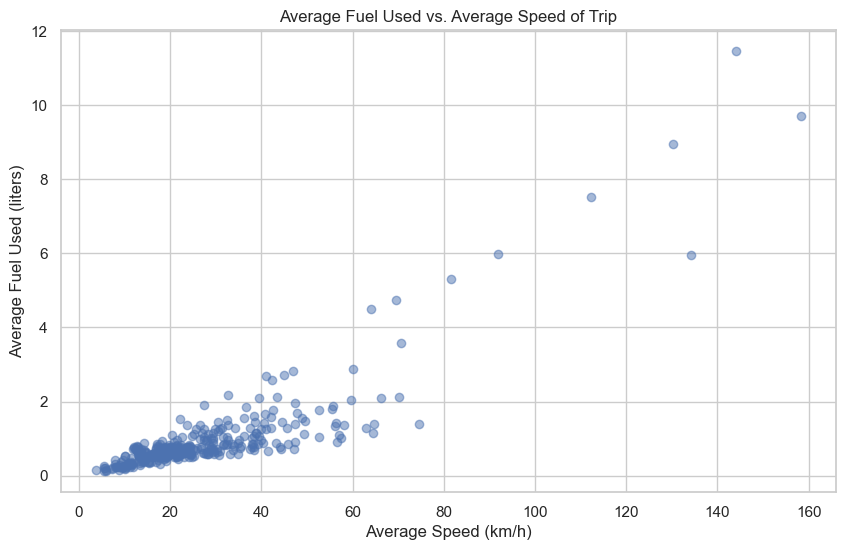

In [33]:
plt.figure(figsize=(10, 6)) 

plt.scatter(df['avg_speed'], df['fuel_used'], alpha=0.5)
plt.title("Average Fuel Used vs. Average Speed of Trip")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Average Fuel Used (liters)")
plt.grid(True)

plt.show()

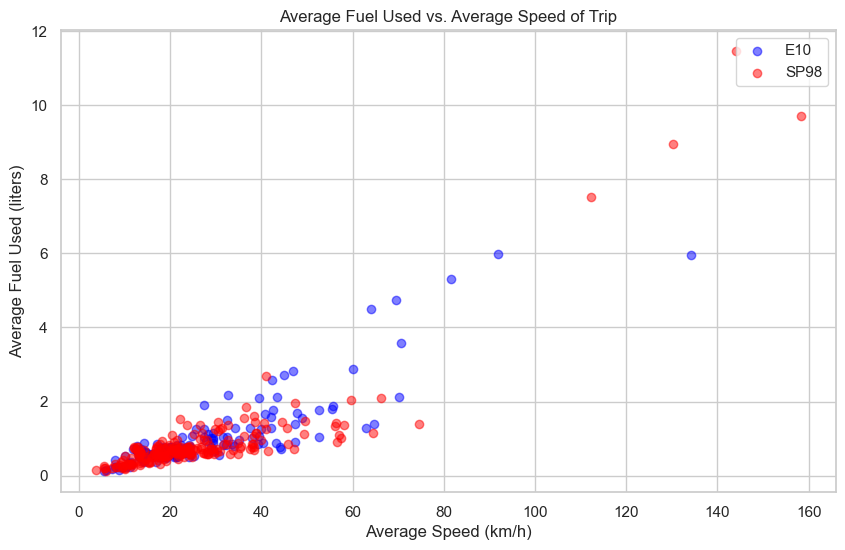

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(e10_data['avg_speed'], e10_data['fuel_used'], alpha=0.5, label='E10', color='blue')
plt.scatter(sp98_data['avg_speed'], sp98_data['fuel_used'], alpha=0.5, label='SP98', color='red')

plt.title("Average Fuel Used vs. Average Speed of Trip")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Average Fuel Used (liters)")
plt.legend()  
plt.grid(True)

plt.show()

Tendentially, more consumption for SP98 for higher average speed trips